In [1]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fdd import FDD
from sklearn.datasets import make_blobs
from time import time

# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
import pickle
from fdd import OperationMode
from fdd import FDD

import scipy.io
from scipy import linalg
from sklearn.datasets import make_blobs
from sklearn.mixture import PGMM
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from matplotlib.colors import LogNorm
from sklearn.grid_search import GridSearchCV
from time import time

In [4]:
# Create and display data set
n_samples = 500
n_features = 10
centers = 3

x, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=centers)
print 'Created {} samples wih {} features and {} centers.'.format(x.shape[0], x.shape[1], centers)

Created 500 samples wih 10 features and 3 centers.


In [3]:
# 1
n_components=np.array([6, 6, 6, 6])
n_pc=np.array([3, 3, 3, 3])
covar_types=np.array([7, 7, 7, 7])
num_models = len(n_components) * len(n_pc) * len(covar_types)

n_jobs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
time_n_job = np.empty(0)

for n_job in n_jobs:
    fdd = FDD(name='TEPFDD',
              training_type='spark',
              n_components=n_components,
              n_pc=n_pc,
              covar_types=covar_types,
              n_jobs=n_job)
    start = time()
    _, _, _, _, id, is_new = fdd.fdd(x)
    end = time()
    train_time = np.array([end - start])
    time_n_job = np.concatenate((time_n_job, train_time), axis=0)
    print '     {} models trained in {} seconds with {} jobs.'.format(num_models, end - start, n_job)
    print '     n_componets'
    print n_components
    print '     n_pc'
    print n_pc
    print '     covar_types'
    print covar_types

There is no model registered, creating a normal one.
     64 models trained in 68.7982530594 seconds with 1 jobs.
     n_componets
[6 6 6 6]
     n_pc
[3 3 3 3]
     covar_types
[7 7 7 7]
There is no model registered, creating a normal one.
     64 models trained in 35.1481890678 seconds with 2 jobs.
     n_componets
[6 6 6 6]
     n_pc
[3 3 3 3]
     covar_types
[7 7 7 7]
There is no model registered, creating a normal one.
     64 models trained in 27.4418849945 seconds with 3 jobs.
     n_componets
[6 6 6 6]
     n_pc
[3 3 3 3]
     covar_types
[7 7 7 7]
There is no model registered, creating a normal one.
     64 models trained in 28.18572402 seconds with 4 jobs.
     n_componets
[6 6 6 6]
     n_pc
[3 3 3 3]
     covar_types
[7 7 7 7]
There is no model registered, creating a normal one.
     64 models trained in 27.7679588795 seconds with 5 jobs.
     n_componets
[6 6 6 6]
     n_pc
[3 3 3 3]
     covar_types
[7 7 7 7]
There is no model registered, creating a normal one.
     64 m

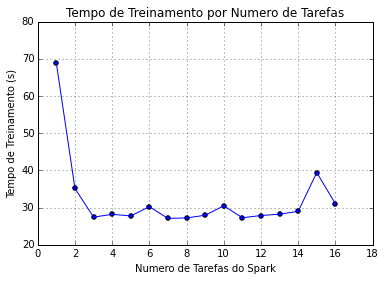

In [4]:
plt.plot(n_jobs, time_n_job)
plt.scatter(n_jobs, time_n_job)
plt.xlabel('Numero de Tarefas do Spark')
plt.ylabel('Tempo de Treinamento (s)')
plt.grid()
plt.title('Tempo de Treinamento por Numero de Tarefas')

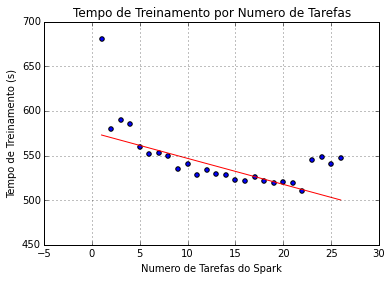

In [2]:
n_jobs2 = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]).T
time_n_job2 = np.array([680, 580, 590, 585, 560, 552, 553, 550, 535, 540, 528, 534, 529, 528, 523, 522, 526, 521, 519, 520, 519, 510, 545, 548, 540, 547])

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(n_jobs2[1:(len(n_jobs2)-3)], time_n_job2[1:(len(n_jobs2)-3)])

plt.plot(n_jobs2, regr.predict(n_jobs2), color='red')

plt.scatter(n_jobs2, time_n_job2)
plt.xlabel('Numero de Tarefas do Spark')
plt.ylabel('Tempo de Treinamento (s)')
plt.grid()
plt.title('Tempo de Treinamento por Numero de Tarefas')